# Lab 4

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/main/book/labs/lab_04.ipynb)

This lab will help you solidify your understanding of working with `NumPy`, `Pandas`, and `GeoPandas` for geospatial data analysis. Through these exercises, you will perform data manipulation, spatial analysis, and visualizations by combining these powerful libraries.

## Exercise 1: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [1]:
import numpy as np

# 1     | Tokyo, New York, London, Paris
coord_list = np.array([(35.6895, 139.6917), (40.7128, -74.0060), (51.5074, -0.1278), (48.8566, 2.3522)])

# 2
rad = np.radians(coord_list)
rad

array([[ 6.22899283e-01,  2.43808010e+00],
       [ 7.10572408e-01, -1.29164837e+00],
       [ 8.98973719e-01, -2.23053078e-03],
       [ 8.52708531e-01,  4.10536347e-02]])

In [2]:
# 3
diff = np.diff(rad, axis=0)
diff

array([[ 0.08767312, -3.72972847],
       [ 0.18840131,  1.28941784],
       [-0.04626519,  0.04328417]])

## Exercise 2: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [3]:
import pandas as pd

url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"

#1
df_data = pd.read_csv(url)

#2
df_top5 = df_data.head(n=5)
df_top5

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [4]:
#3
df_filtered = df_data[df_data["population"] > 1_000_000].head(n=10)
df_filtered

,id,name,country,latitude,longitude,population
97,98,Turin,ITA,45.07039,7.66996,1652000
103,104,Lille,FRA,50.64997,3.08001,1044000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000
126,127,Manchester,GBR,53.50042,-2.24799,2230000
127,128,Gujranwala,PAK,32.16043,74.18502,1513000
128,129,Incheon,KOR,37.47615,126.64223,2550000
129,130,Benin City,NGA,6.34048,5.62001,1190000
130,131,Xiamen,CHN,24.44999,118.08002,2519000
131,132,Nanchong,CHN,30.78043,106.13000,2174000


In [5]:
#4
df_grouped = df_filtered.groupby("country")["population"].sum().sort_values(ascending=False)
df_grouped

country
CHN    4693000
USA    2763000
KOR    2550000
GBR    2230000
ITA    1652000
PAK    1513000
NGA    1190000
FRA    1044000
Name: population, dtype: int64

In [6]:
#5
df_filtered.sort_values("population", ascending=False)

,id,name,country,latitude,longitude,population
128,129,Incheon,KOR,37.47615,126.64223,2550000
130,131,Xiamen,CHN,24.44999,118.08002,2519000
126,127,Manchester,GBR,53.50042,-2.24799,2230000
131,132,Nanchong,CHN,30.78043,106.13000,2174000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
97,98,Turin,ITA,45.07039,7.66996,1652000
127,128,Gujranwala,PAK,32.16043,74.18502,1513000
129,130,Benin City,NGA,6.34048,5.62001,1190000
103,104,Lille,FRA,50.64997,3.08001,1044000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000


## Exercise 3: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

In [7]:
import geopandas as gpd

#1 Load New York City building dataset from GeoJSON file using GeoPandas
url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
geo_data_frame = gpd.read_file(url)
geo_data_frame.head(n=5)

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."


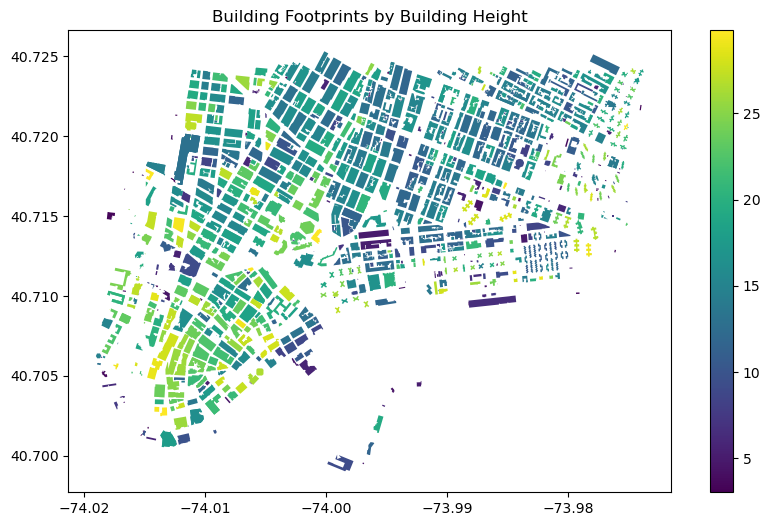

In [8]:
import matplotlib.pyplot as plt

category = "height_MS"
title = "Building Footprints by Building Height"

#2 Create a plot of building footprints and color based on building height
geo_data_frame.plot(category, legend=True, figsize=(10,6))
plt.title(title)
plt.show()

In [9]:
#3 Create interactive map of building footprints and color based on building height
geo_data_frame.explore(category, legend=False)

In [10]:
#4 Calculate the average building height (use the `height_MS` column)
total = geo_data_frame[category].sum()
count = len(geo_data_frame[category])
average = total / count
print(f"{average:.2f}")

14.31


In [11]:
#5 Select buildings with a height greater than the average height
tall_buildings_df = geo_data_frame[geo_data_frame[category] > average]
tall_buildings_df.head()

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."


In [12]:
#6 Save the GeoDataFrame to a new GeoJSON file
output_file = "nyc_tall_buildings.geojson"
tall_buildings_df.to_file(output_file, driver="GeoJSON")
print(f"GeoDataFrame saved to \"{output_file}\" successfully")

GeoDataFrame saved to "nyc_tall_buildings.geojson" successfully


## Exercise 4: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

In [13]:
# 1 load DataSet from URL
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
world_cities_df = pd.read_csv(url)
world_cities_df.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [14]:
# 2 filter dataset
category = world_cities_df.latitude
cities_filtered_df = world_cities_df[ (category > -40) & (category < 60) ]
cities_filtered_df.tail()

,id,name,country,latitude,longitude,population
1244,1245,Rio de Janeiro,BRA,-22.92502,-43.22502,11748000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1246,1247,Sydney,AUS,-33.92001,151.18518,4630000
1247,1248,Singapore,SGP,1.29303,103.85582,5183700
1248,1249,Hong Kong,CHN,22.30498,114.18501,7206000


In [15]:
# 3 convert DataFrame to GeoDataFrame
cities_filtered_gdf = gpd.GeoDataFrame(
    cities_filtered_df, 
    geometry=gpd.points_from_xy(
        cities_filtered_df.longitude, 
        cities_filtered_df.latitude
    )
)
cities_filtered_gdf.head()

,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.5833,32.5333,75000,POINT (32.5333 0.5833)
1,2,Fort Portal,UGA,0.6710,30.2750,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.6420,15.7990,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.5630,14.6560,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.7370,7.3150,34062,POINT (7.315 45.737)


In [16]:
# 4 Reproject the GeoDataFrame to the Mercator projection (EPSG:3857)
cities_filtered_gdf.crs = "EPSG:3857"
gdf_3857 = cities_filtered_gdf.to_crs(epsg=3857)
gdf_3857.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
# 5 Calculate the distance (in meters) between each city and the city of Paris
